# CSCI-250: Project 2

## By Lucy Buhayenko

### I'm importing libraries

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


### I read data from Walmart_Sales csv and create a dataframe called df

In [68]:
df = pd.read_csv('Walmart_Sales.csv')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


### I check how many rows and columns are in the dateset


In [69]:
df.shape

(6435, 8)

### I check how many missing values there are in each column


### There are 0 missing values in each column so there is no need to drop/replace any values

In [70]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

### Here I check the data types of each column to know if I'll be able to use those columns to create plots, Lasso regression, etc.


In [71]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

## Plotting Histograms
##### - Stores are numbered from 1 to 45; There are sales in every store
##### - There are more low to mid range sales(< $1.5 million) then there are those that are >$1.5 million
##### - 0 is no holiday, 1 is holiday. There are much more sales on non-holiday days then on holiday days(since Walmart can just be closed during some holidays)
##### - Sales are much higher when the temperature is around 70 degress Fahrenheit then when the temperature is 100 degrees Fahrenheit, since when it's too hot people don't want to come
##### - Sales are the best when the fuel price is around $3.6
##### - When CPI is low then there are the most sales
##### - When unemployement is too high (13%), then Sales are the lowest

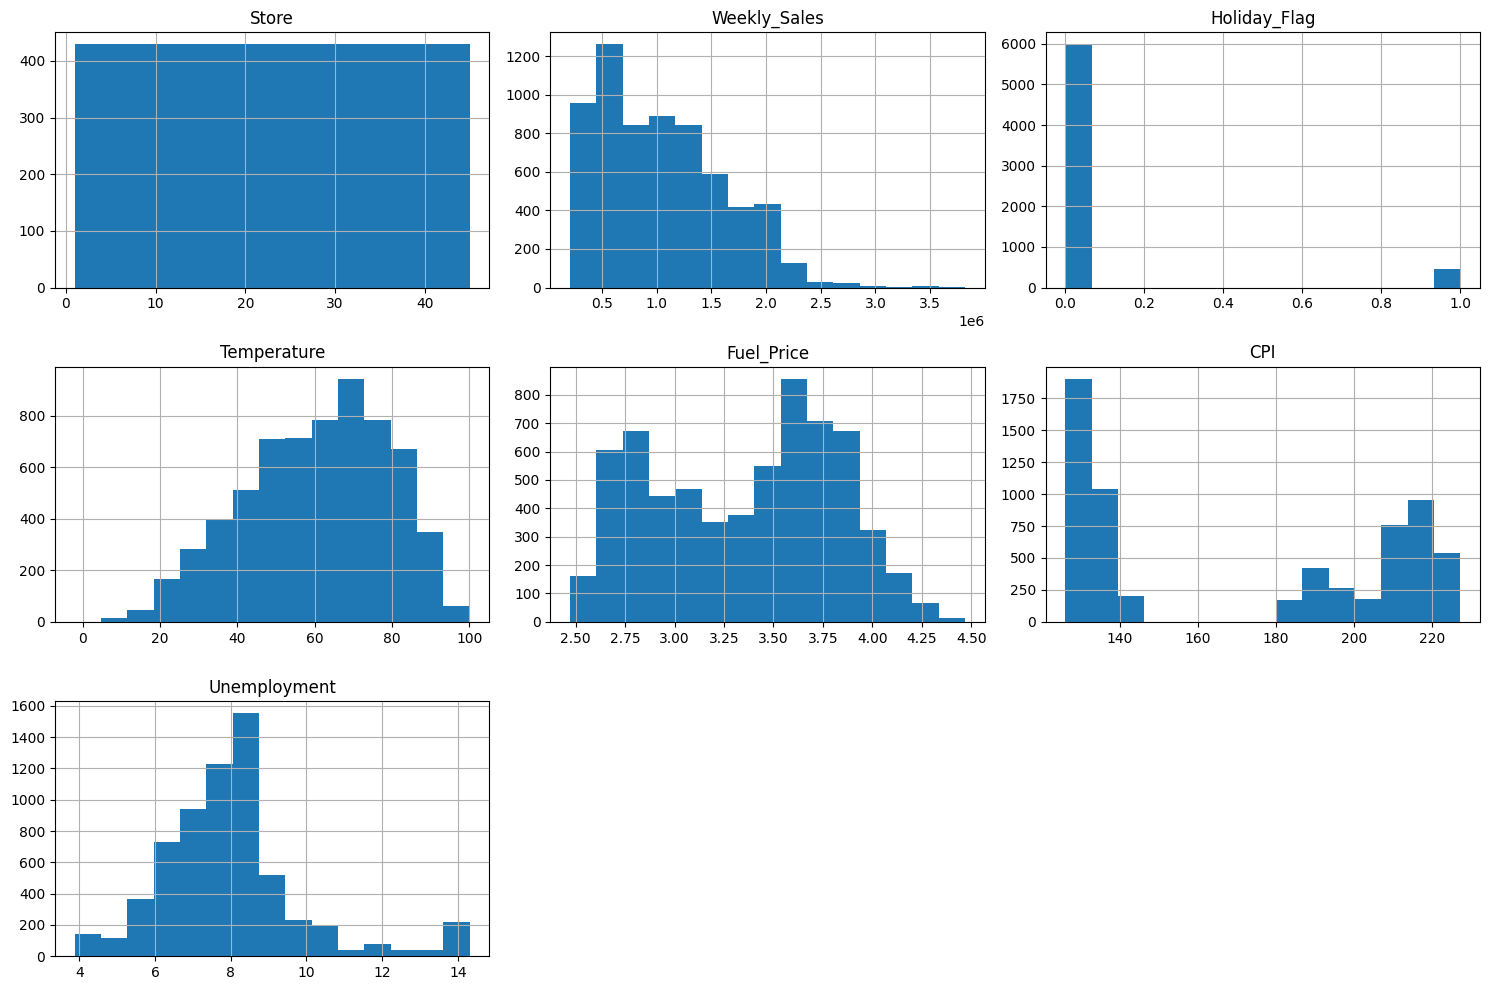

In [72]:
df.hist(figsize=(15, 10), bins=15)
plt.tight_layout()
plt.show()

### I'm splitting the data into features(X) and labels(y)


In [73]:
y = df['Weekly_Sales']

X = df[['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]

## I'm plotting scatter plots to visualize the relationship between each feature in the dataset X and the target variable (Weekly Sales).
##### - Sales vary widely across stores
##### - Most points are 0 which are not holiday days. There are points called 1 (holidays) it shows that there are lower peaks in sales, meaning that non - holidays are better with sales. Possibly because they are closed on certain holidays
##### - Temperature ranges from 0 to 100, there is no strong correlation
##### - Sales happen across the fuel range of 2.5 to 4.5 dollars
##### - Sales happen across the CPI range (130 to 230)
##### - Sales happen across different unemployment rates (4 - 15)

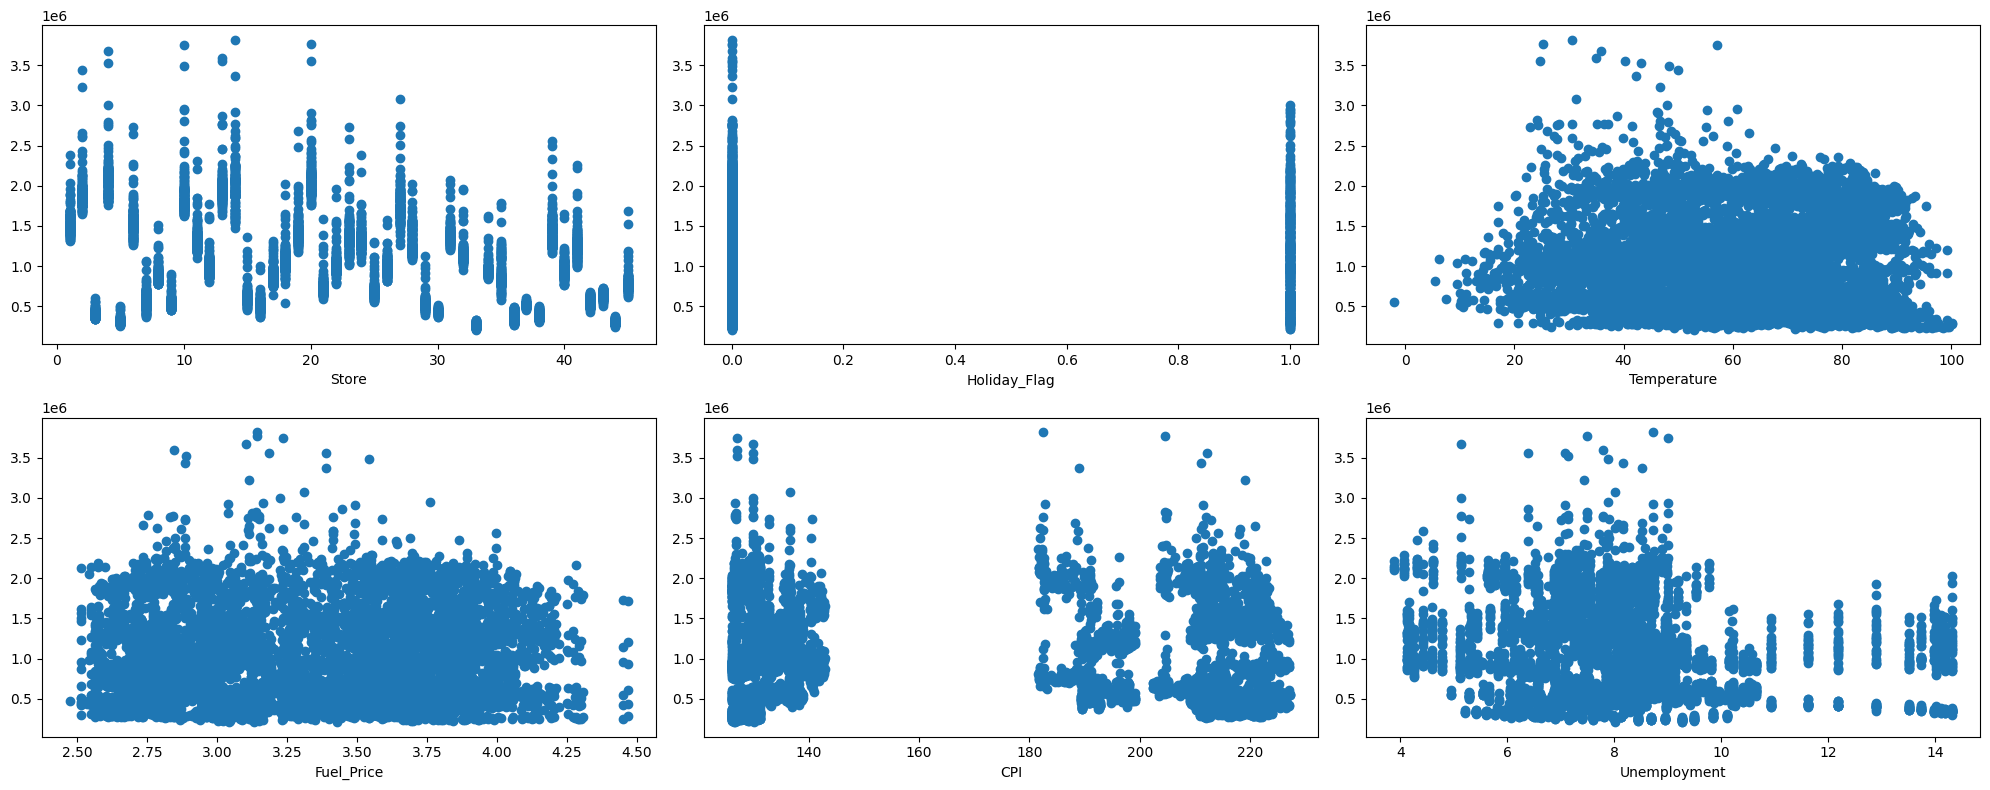

In [74]:
um_cols = len(X.columns)
ncols = 3
nrows = int(np.ceil(um_cols / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(20, 4 * nrows))
axes = axes.flatten()

for i, col in enumerate(X.columns):
    axes[i].scatter(X[col], df['Weekly_Sales'])
    axes[i].set_xlabel(col)
# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

# I'm plotting the correlation heatmap to see if there are any highly correlated features.

### I'm not dropping any features because they are not highly correlated. There is a correlation between feature 4 and 5 which are the Unemployment and CPI. But the correlation is not high. It's only -0.302. Therefore, I don't drop any feautres.

In [ ]:
#print the correlation between unemployemnt and CPI
Hmap = np.corrcoef(X.transpose())
Hmap, Hmap[4,5], Hmap[5,4]
#The features are not highly correlated bc it's only -0.3

(array([[ 1.00000000e+00, -4.29224473e-18, -2.26590768e-02,
          6.00229546e-02, -2.09491930e-01,  2.23531274e-01],
        [-4.29224473e-18,  1.00000000e+00, -1.55091329e-01,
         -7.83465181e-02, -2.16209127e-03,  1.09602843e-02],
        [-2.26590768e-02, -1.55091329e-01,  1.00000000e+00,
          1.44981806e-01,  1.76887676e-01,  1.01157857e-01],
        [ 6.00229546e-02, -7.83465181e-02,  1.44981806e-01,
          1.00000000e+00, -1.70641795e-01, -3.46837449e-02],
        [-2.09491930e-01, -2.16209127e-03,  1.76887676e-01,
         -1.70641795e-01,  1.00000000e+00, -3.02020064e-01],
        [ 2.23531274e-01,  1.09602843e-02,  1.01157857e-01,
         -3.46837449e-02, -3.02020064e-01,  1.00000000e+00]]),
 np.float64(-0.30202006372224843),
 np.float64(-0.30202006372224843))

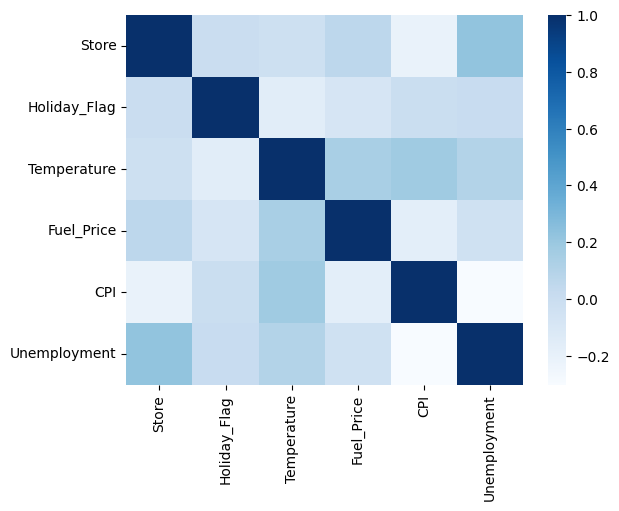

In [76]:
sns.heatmap(X.corr(), annot=False, fmt=".2f", cmap="Blues")
plt.show()

### Histogram of the labels shows distribution of Walmart Weekly Sales. It demostrtrates that majority of sales are low to mid range (< 1.5 million). When sales are >$1.5 million then it's less common.

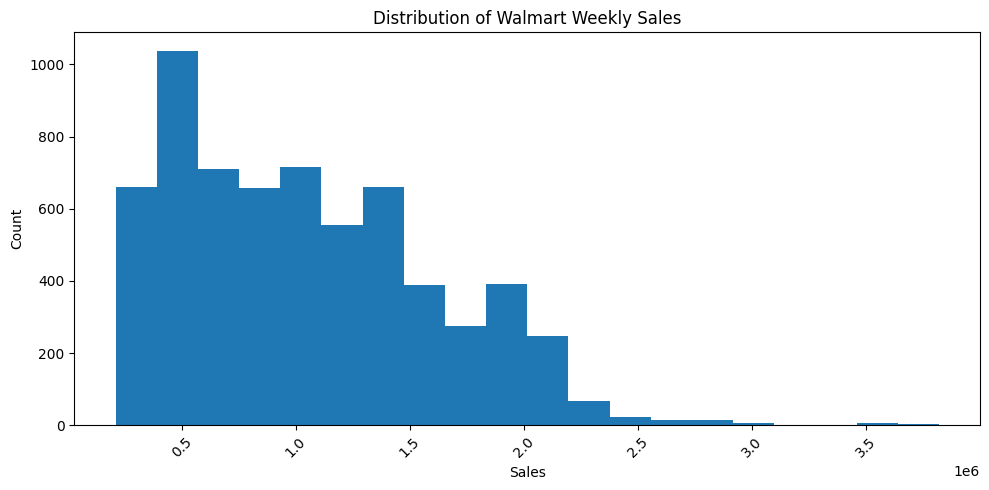

In [77]:
plt.figure(figsize=(10, 5))
plt.hist(df['Weekly_Sales'], bins=20)
plt.ylabel('Count')
plt.xlabel('Sales')
plt.title('Distribution of Walmart Weekly Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### I created a categorized scatter plot to visualize the relationship between Store and Fuel Price, with the data points color-coded based on the level of Weekly Sales. Red color is defined as Low Sales(< $1,000,000), Blue color is Mid Sales(between $1,000,000 and $2,000,000) and Green color is High Sales(> $2,000,000).

### The graph shows that the fuel price ranges from $2.50 to $4.50. Majority of points are red and blue, meaning that majority of stores fall into the low to mid sales range across all fuel prices. Based on this graph, we can conclude that fuel price doesn't strongly determine sales levels.

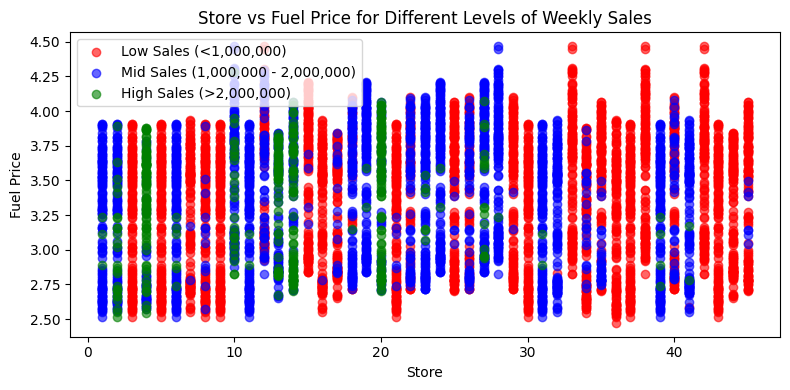

In [78]:
y = df['Weekly_Sales'].values  # y is now Weekly_Sales

# Define sales bins (Low, Mid, High Sales)
low_sales = y < 1000000
mid_sales = (y >= 1000000) & (y < 2000000)
high_sales = y >= 2000000

# Create scatter plots for each sales category
plt.figure(figsize=(8, 4))

# Plot Low Sales
plt.scatter(df['Store'][low_sales], df['Fuel_Price'][low_sales], c='r', label='Low Sales (<1,000,000)', alpha=0.6)

# Plot Mid Sales
plt.scatter(df['Store'][mid_sales], df['Fuel_Price'][mid_sales], c='b', label='Mid Sales (1,000,000 - 2,000,000)', alpha=0.6)

# Plot High Sales
plt.scatter(df['Store'][high_sales], df['Fuel_Price'][high_sales], c='g', label='High Sales (>2,000,000)', alpha=0.6)

# Axis labels and title
plt.xlabel('Store')
plt.ylabel('Fuel Price')
plt.title('Store vs Fuel Price for Different Levels of Weekly Sales')

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

### Installing scikit-learn

In [79]:
pip install scikit-learn



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip3.12 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Dropping columns: Date, Holiday_Flag and Store, since they are not useful for Lasso regression because they are categorical(Holiday flag), string value(Date) or just a number that we keep to track order(Store).


In [80]:
df = df.drop(['Date', 'Holiday_Flag', 'Store'], axis=1)

### Here I'm redefining X and y after I dropped 3 columns. Also, I'm converting the data type of X and y from DataFrames to arrays to successfully make Lasso regression after this.


In [81]:
y = df['Weekly_Sales']

X = df[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]


X = X.values
y = y.values

# Splitting Data

### Splitting the data into 80% training set, 10% testing set and 10% validation set. Also, printing the sets' shapes to check whether the data split was correct. The printed shape values prove that everything was splitted correctly, since the training set shape is (5148, 4) (5148,), the validation set shape is (643, 4) (643,) and the testing set shape is (644, 4) (644,)

In [82]:
#splitting data into training and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2) # training set = 80%
#making the validation set 
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5) # validation set = 10%; testing set = 10%

print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (5148, 4) (5148,)
Validation set shape: (643, 4) (643,)
Test set shape: (644, 4) (644,)


# Scaler

### I standardize the training, validation, and testing datasets for both the feature data (X) and the target data (y). I rescale data to a fixed range (between 0 and 1). I need a scaler because it standardizes the input data, which prevents features with larger numerical values from disproportionately influencing the model's coefficients and ensures faster, more stable training.

In [83]:
#Scaler
scalerX = StandardScaler()
scalery = StandardScaler()

X_train_scaled = scalerX.fit_transform(X_train)
X_val_scaled = scalerX.transform(X_val)
X_test_scaled = scalerX.transform(X_test)

y_train_scaled = scalery.fit_transform(y_train[:,np.newaxis])
y_val_scaled = scalery.fit_transform(y_val[:,np.newaxis])
y_test_scaled = scalery.fit_transform(y_test[:,np.newaxis])

# Lasso

### All of the R2 scores are extremely close. All of them are around 0.033 It looks like the best R2 score is when alpha = 0.001 because it's 0.03339344178357939

In [84]:
# Define the range of alpha values to search (removed 2)
alphas = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]

for a in alphas:
    lasso_model = Lasso(alpha=a)
    lasso_model.fit(X_train_scaled, y_train_scaled)
    y_pred = lasso_model.predict(X_test_scaled)
    score = r2_score(y_test_scaled, y_pred)
    print(f"{a}:{score}")

1:0.0
0.1:0.0010518169171414016
0.01:0.03144030423110722
0.001:0.033229131428509695
0.0001:0.03339344178357939
1e-05:0.03340957198789918


### I decide that the best lasso is when alpha is 0.001. Now I'm fittinig the scaled X_train and Y_train on the lasso model and predicting the scaled value and then unscaling the prediction so that it'll make sense.

In [85]:
# Fit Lasso on scaled data
lasso_model = Lasso(alpha=0.001) 
lasso_model.fit(X_train_scaled, y_train_scaled)

# Predict on scaled test data
y_pred_test_scaled = lasso_model.predict(X_test_scaled)
y_pred_train_scaled = lasso_model.predict(X_train_scaled)

# undo scaling
y_test_pred = scalery.inverse_transform(y_pred_test_scaled.reshape(-1,1))
y_train_pred = scalery.inverse_transform(y_pred_train_scaled.reshape(-1,1))

# Slope

### Based on Lasso regression, I determine which features are useful by identifying which ones have non-zero coefficients (slopes). Lasso performed feature selection by shrinking some coefficients to zero. The useful features were those that had non-zero coefficients. In my case, all 4 features that I have are useful, since their slopes are non-zero. The results are:
#### - Lasso Coefficients (slopes): -0.03441189, -0.0059854, -0.10021146, -0.13350101
#### - Useful Features (non-zero coefficients): [0 1 2 3] ('Temperature', 'Fuel_Price', 'CPI', 'Unemployment')
#### - Mean of y (Weekly Sales): 1046114.7374067599
#### - R2 score on training data: 0.0231

In [86]:
# Coefficients
coefficients = lasso_model.coef_
useful_features = np.where(coefficients != 0)[0]

print("\nLasso Coefficients (slopes):", coefficients)
print("Useful Features (non-zero coefficients):", useful_features)

# Predict on train and test
y_pred_train = lasso_model.predict(X_train_scaled)
y_pred_test = lasso_model.predict(X_test_scaled)

#print the mean of y
print("Mean of y (Weekly_Sales):", np.mean(y_train))


# R2 score
r2_train = r2_score(y_train_scaled, y_pred_train)

print(f"\nR2 score on training data (Lasso): {r2_train:.4f}")


Lasso Coefficients (slopes): [-0.03441189 -0.0059854  -0.10021146 -0.13350101]
Useful Features (non-zero coefficients): [0 1 2 3]
Mean of y (Weekly_Sales): 1046114.7374067599

R2 score on training data (Lasso): 0.0231


# Plotting ${y}$ and $\tilde{y}$ 

### I am plotting the actual(${y}$) vs predicted ($\tilde{y}$) values in the Training Set and Testing Set for Lasso regression. In training set the blue points are clustered near the left side where the points are around 1,000,000 on predicted values, even when actaul values vary between 500,000 and 3,500,000. This means that the model fits the training data somewhat but it has trouble to capture the full range of variation. In testing set the green points, similarly to the training set, are located around 1,000,000 instead of following the diagonal red prediction line. This means that the model predicts something close to the average. Both sets show that Lasso model is underfitting and doesn't capture the highs and lows.

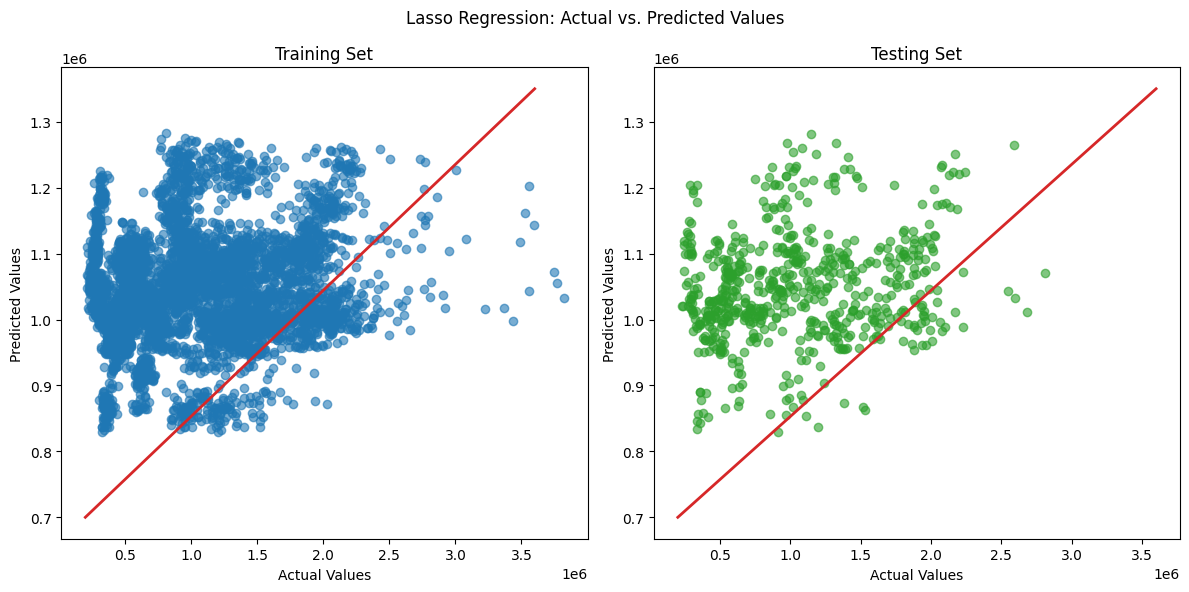

In [87]:
y_train_original = y_train  #unscaled
y_test_original = y_test    #unscaled

#Plotting Actual vs Predicted
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Lasso Regression: Actual vs. Predicted Values')

# Training set
ax1.scatter(y_train_original, y_train_pred, alpha=0.6, color='tab:blue')
ax1.set_title('Training Set')
ax1.set_xlabel('Actual Values')
ax1.set_ylabel('Predicted Values')
ax1.plot([200000, 3600000],
         [700000, 1350000], 'tab:red', linewidth=2)

# Testing set
ax2.scatter(y_test_original, y_test_pred, alpha=0.6, color='tab:green')
ax2.set_title('Testing Set')
ax2.set_xlabel('Actual Values')
ax2.set_ylabel('Predicted Values')
ax2.plot([200000, 3600000],
         [700000, 1350000], 'tab:red', linewidth=2)

plt.tight_layout()
plt.show()

# Adding a new Row of data and predicting Weekly Sales

### Firstly, I standardize the features and label using scaling. Then, I find the medians for 4 features that I have. I store them in xxxx_medians as a list in order to perform scaling. I scale the 4 features and use Lasso to make a prediction of what the weekly sales label could be. After I make a prediction, I unscale the value so that it's not between 0 and 1 anymore but instead could be a value that could be interpreted. I print that the predicted value for the new row is $1,033,381.43 of weekly sales, which sounds about right. After that, I unscale the 4 features' medians to see each value. The median for temperature is: 62.67 Fahrenheit, median for fuel price is $3.44, median for CPI is 182.62, median for unemployment is 7.87 percent

In [88]:
# predict new row 
scalerX.fit(df[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']])
scalery.fit(df[['Weekly_Sales']])

#adding a new row of data

#finding medians 

temp_median = df['Temperature'].median()
fuel_median = df['Fuel_Price'].median()
cpi_median = df['CPI'].median()
ue_median = df['Unemployment'].median()


#creating a list with medians
xxxx_medians = [[temp_median, fuel_median, cpi_median, ue_median]]

#making the medians scaled
scaled_medians = scalerX.transform(xxxx_medians)

#making a prediction using the scaled median values
pred_median = lasso_model.predict(scaled_medians)

#inverse transform the prediction to get the value in the original scale
unscaled_medians = scalerX.inverse_transform(scaled_medians)
unscaled_pred = scalery.inverse_transform(pred_median.reshape(-1, 1))

#printiing the prediction
print(f"The predicted value for the new row is: {unscaled_pred[0][0]:.2f}")

#printing the unscaled medians of each feature
print(f"The unscaled median of Temperature feature is: {unscaled_medians[0][0]} Fahrenheit")
print(f"The unscaled median of Fuel Price feature is: ${unscaled_medians[0][1]:.2f} per gallon")
print(f"The unscaled median of CPI feature is: {unscaled_medians[0][2]:.2f}")
print(f"The unscaled median of Unemployment feature is: {unscaled_medians[0][3]:.2f} percent")

The predicted value for the new row is: 1033381.43
The unscaled median of Temperature feature is: 62.67 Fahrenheit
The unscaled median of Fuel Price feature is: $3.44 per gallon
The unscaled median of CPI feature is: 182.62
The unscaled median of Unemployment feature is: 7.87 percent


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
